In [1]:
from os.path import join

import numpy as np
from numpy.linalg import svd
from numpy.random import permutation

from scipy.io import loadmat
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import matplotlib.pyplot as plt
plt.rcParams['font.size'] =  18

In [2]:
# Wavelet encoded images
dogdata_w_mat = loadmat(join('..', 'DATA', 'dogData_w.mat'))
catdata_w_mat = loadmat(join('..', 'DATA', 'catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

_, nimages = dog_wave.shape

CD = np.hstack((dog_wave, cat_wave))

U, S, VT = svd(CD - CD.mean(), full_matrices=False)
V = VT.T

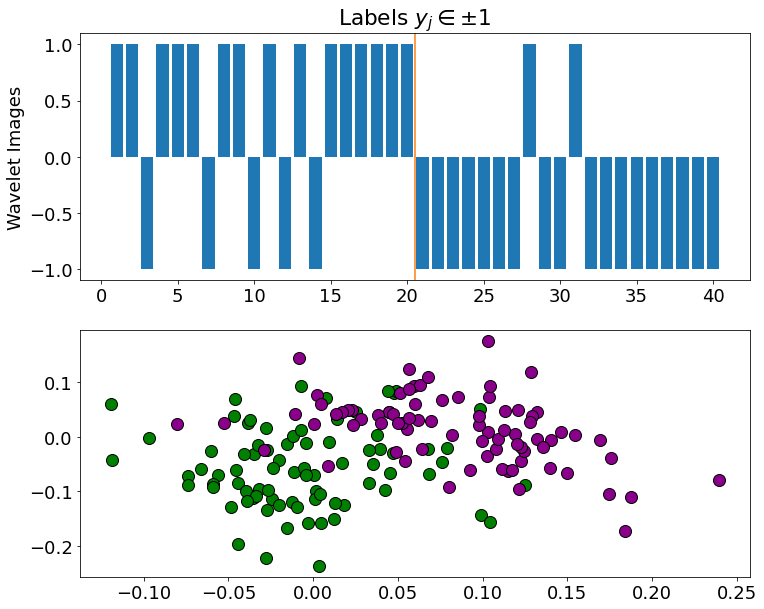

In [3]:
# Figure 1.19 (middle row)

ntrain = 60
ntest = nimages - ntrain
modes = [2, 4]
cols = np.array(modes) - 1

train = np.vstack((
    V[:ntrain, cols],
    V[nimages:nimages+ntrain, cols]
))
labels = np.repeat([1, -1], ntrain)
test = np.vstack((
    V[ntrain:nimages, cols],
    V[nimages+ntrain:, cols]
))

predictions = LinearDiscriminantAnalysis().fit(
    train, labels
).predict(test)

fig, axs = plt.subplots(2, figsize=(12, 10))
axs[0].bar(np.arange(2*ntest) + 1, predictions)
axs[0].axvline(ntest+0.5, color='C1')
axs[0].set_title(r'Labels $y_j \in {\pm 1}$')
axs[0].set_ylabel('Wavelet Images')

axs[1].plot(V[:nimages, 1], V[:nimages, 3], 'o', markerfacecolor='green', markeredgecolor='black', ms=12)
axs[1].plot(V[nimages:, 1], V[nimages:, 3], 'o', markerfacecolor='darkmagenta', markeredgecolor='black', ms=12);

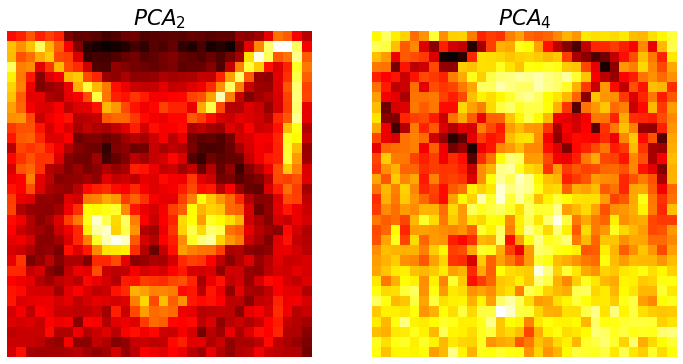

In [4]:
# Figure 1.19 (top row)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
titles = [f'$PCA_{i}$' for i in modes]
for j, (ax, title) in enumerate(zip(axs, titles)):
    U3 = np.flipud(np.reshape(U[:, 2*j+1], (32, 32)))
    ax.pcolor(np.rot90(U3), cmap='hot')
    ax.axis(False)
    ax.set_title(title)

In [5]:
# Raw unencoded images
dogdata_mat = loadmat(join('..', 'DATA', 'dogData.mat'))
catdata_mat = loadmat(join('..', 'DATA', 'catData.mat'))

dog = dogdata_mat['dog']
cat = catdata_mat['cat']

_, nimages = dog.shape

CD = np.hstack((dog_wave, cat_wave))
U, S, VT = svd(CD - CD.mean(), full_matrices=False)
V = VT.T

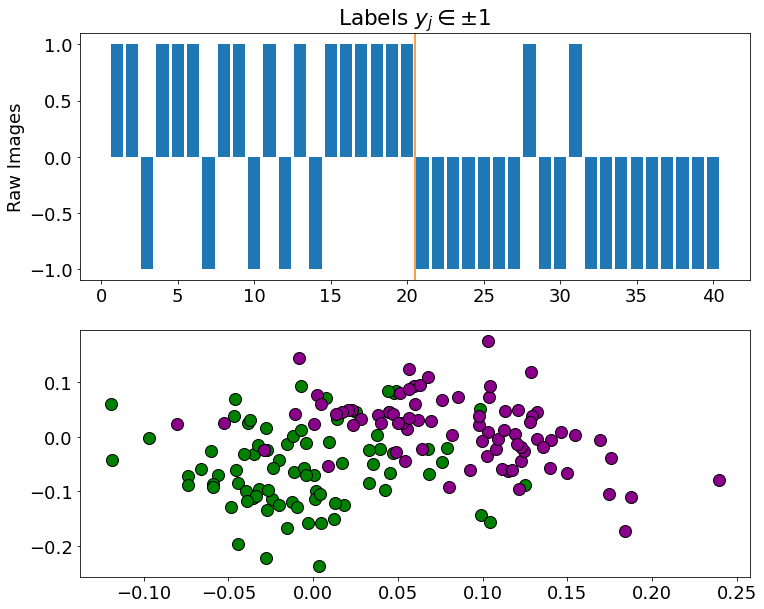

In [6]:
# Figure 1.19 (bottom row)

ntrain = 60
ntest = nimages - ntrain
modes = [2, 4]
cols = np.array(modes) - 1

train = np.vstack((
    V[:ntrain, [1, 3]],
    V[nimages:nimages+ntrain, [1, 3]]
))
labels = np.repeat([1, -1], ntrain)
test = np.vstack((
    V[ntrain:nimages, np.array([1, 3])],
    V[nimages+ntrain:, np.array([1, 3])]
))

predictions = LinearDiscriminantAnalysis().fit(
    train, labels
).predict(test)

fig, axs = plt.subplots(2, figsize=(12, 10))
axs[0].bar(np.arange(2*ntest) + 1, predictions)
axs[0].axvline(ntest+0.5, color='C1')
axs[0].set_title(r'Labels $y_j \in {\pm 1}$')
axs[0].set_ylabel('Raw Images')

axs[1].plot(V[:80, 1], V[:80, 3], 'o', markerfacecolor='green', markeredgecolor='black', ms=12)
axs[1].plot(V[80:, 1], V[80:, 3], 'o', markerfacecolor='darkmagenta', markeredgecolor='black', ms=12);

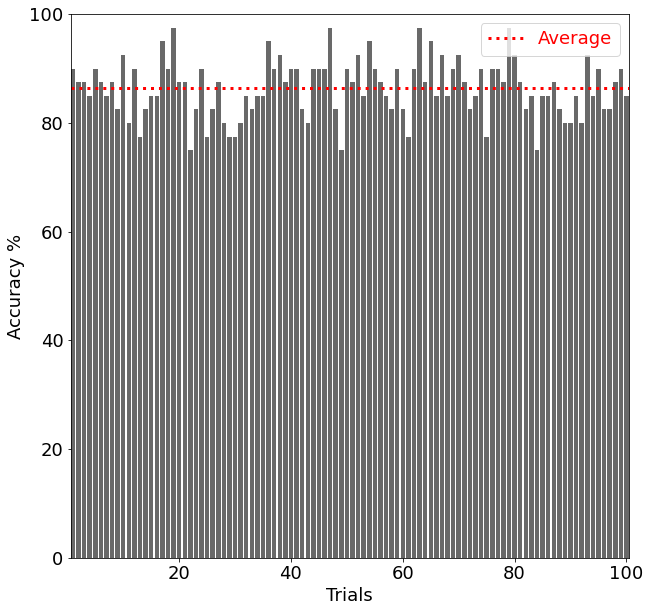

In [7]:
# Figure 5.20
## Cross-validate
ntrain = 60
ntest = nimages - ntrain
modes = [2, 4]
cols = np.array(modes) - 1

ntrials = 100
errors = []
for _ in range(ntrials):
    # Random split of rows into test and train for each of cat and dog sections 
    dog_rows, cat_rows = permutation(nimages), permutation(nimages)
    dog_training_rows = dog_rows[:ntrain]
    cat_training_rows = nimages + cat_rows[:ntrain]
    dog_test_rows = dog_rows[ntrain:]
    cat_test_rows = nimages + cat_rows[ntrain:]    
    
    train = np.vstack((
        V[dog_training_rows[:, np.newaxis], cols],
        V[cat_training_rows[:, np.newaxis], cols]
    ))
    test = np.vstack((
        V[dog_test_rows[:, np.newaxis], cols],
        V[cat_test_rows[:, np.newaxis], cols]
    ))
    labels = np.repeat([1, -1], ntrain)
    truth = np.repeat([1, -1], ntest)

    predictions = LinearDiscriminantAnalysis().fit(
        train, labels
    ).predict(test)
    errors += [np.mean(abs(predictions - truth) / 2)]

accuracies = 100 * (1 - np.array(errors))

fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(range(1, ntrials+1), accuracies, color='dimgray')
ax.set_ylim((0, 100))

ax.axhline(np.mean(accuracies), linestyle=':', color='red', linewidth=3, label='Average')
ax.margins(0)
ax.set_xlabel('Trials')
ax.set_ylabel('Accuracy %')
legend = ax.legend()
for text in legend.get_texts():
    text.set_color('red')

In [8]:
# Wavelet encoded images

dogdata_w_mat = loadmat(join('..', 'DATA', 'dogData_w.mat'))
catdata_w_mat = loadmat(join('..', 'DATA', 'catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

_, nimages = dog_wave.shape

CD = np.hstack((dog_wave, cat_wave))
U, S, VT = np.linalg.svd(CD - CD.mean(), full_matrices=False)
V = VT.T

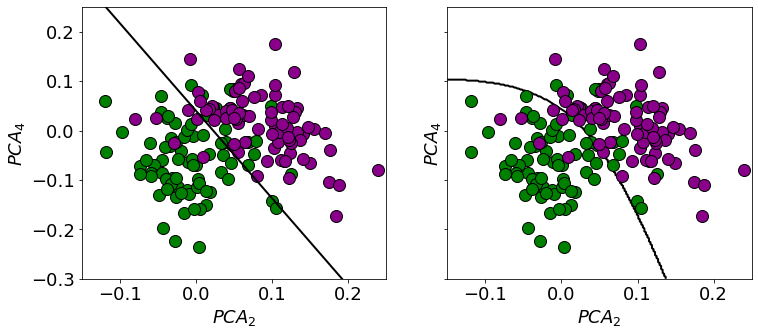

In [9]:
# Figure 5.21

ntrain = 60
ntest = nimages - ntrain
modes = [2, 4]
cols = np.array(modes) - 1

train = np.vstack([
    V[:ntrain, cols],
    V[nimages:nimages+ntrain, cols]
])
test = np.vstack((
    V[ntrain:nimages, cols],
    V[nimages+ntrain:, cols]
))
labels = np.repeat([1, -1], ntrain)

# Linear Discriminant
lda_fit = LinearDiscriminantAnalysis().fit(train, labels)
lda_K = -lda_fit.intercept_[0]
lda_L = -lda_fit.coef_[0]

# Quadratic Discriminant
qda_fit = QuadraticDiscriminantAnalysis().fit(train, labels)

xmin, xmax = -0.15, 0.25
ymin, ymax = -0.3, 0.25
xs = np.arange(xmin, xmax, 0.002)
ys = np.arange(ymin, ymax, 0.002)

lda_ys = -(lda_L[0]*xs + lda_K) / lda_L[1]

X, Y = np.meshgrid(xs, ys)
XY = np.dstack([X, Y]).transpose([0, 1, 2]).reshape(-1, 2)
Z = qda_fit.predict(
    XY
).reshape(*X.shape)

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 5))
for ax in axs:
    ax.plot(V[:nimages, 1], V[:nimages, 3], 'o', markerfacecolor='green', markeredgecolor='black', ms=12)
    ax.plot(V[nimages:, 1], V[nimages:, 3], 'o', markerfacecolor='darkmagenta', markeredgecolor='black', ms=12)
    ax.set_xlabel('$PCA_2$')
    ax.set_ylabel('$PCA_4$')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
axs[0].plot(xs, lda_ys, color='black', linewidth=2)
axs[1].contour(X, Y, Z, 0, colors='black', linewidths=2);